### Import libraries 

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

2025-04-21 19:17:13.844015: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745255833.858727   62168 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745255833.863142   62168 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745255833.874733   62168 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745255833.874748   62168 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745255833.874750   62168 computation_placer.cc:177] computation placer alr

### Data Preprocessing

### Training Image preprocessing 

In [10]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)


Found 70295 files belonging to 38 classes.


I0000 00:00:1745255839.999783   62168 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4807 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5


### Validation Image Peprocessing

In [11]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 17572 files belonging to 38 classes.


In [12]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [13]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[227.25 222.25 222.75]
   [190.   187.   192.  ]
   [143.25 144.75 158.25]
   ...
   [ 93.25  82.75  96.25]
   [ 96.75  87.    94.75]
   [ 93.5   84.5   88.5 ]]

  [[225.5  220.5  221.  ]
   [190.75 187.75 193.75]
   [139.25 140.5  155.5 ]
   ...
   [ 95.5   85.    97.5 ]
   [ 95.75  85.75  95.  ]
   [ 94.    84.75  90.5 ]]

  [[223.75 218.5  220.75]
   [185.   182.   189.  ]
   [132.5  133.5  149.  ]
   ...
   [ 97.25  87.25  98.25]
   [ 95.25  85.25  95.75]
   [ 98.    88.    97.25]]

  ...

  [[121.   144.75 110.75]
   [ 83.75 111.25  78.25]
   [ 76.5  108.75  77.5 ]
   ...
   [115.   101.    85.75]
   [138.   122.25 103.75]
   [143.   127.25 107.  ]]

  [[120.75 140.75 108.25]
   [ 88.25 113.5   83.25]
   [ 89.   120.    91.5 ]
   ...
   [141.75 129.75 114.75]
   [190.25 177.25 161.  ]
   [205.   193.   176.5 ]]

  [[154.5  172.5  140.5 ]
   [ 98.5  121.    92.5 ]
   [ 98.25 129.25 101.75]
   ...
   [174.25 162.25 148.25]
   [224.5  210.5  197.5 ]
   [251.5  243.25 23

### Building Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [15]:
model = Sequential()

### Building Convolution Layer 

In [16]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/home/predator/sh/clear/envs/tf-env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [19]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [20]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [21]:
model.add(Dropout(0.25))  #To avoid overfitting

### Flattening

In [22]:
model.add(Flatten())

### Hidden layer

In [23]:
model.add(Dense(units=1500,activation='relu'))

In [24]:
model.add(Dropout(0.4))  #To avoid underfitting

### Output layer

In [28]:
 model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [29]:
 model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
 model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model training

In [32]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
1203/2197 ━━━━━━━━━━━━━━━━━━━━ 59s 59ms/step - accuracy: 0.9838 - loss: 0.0501

KeyboardInterrupt: 

### Model Evaluation

In [ ]:
### Model evaluation on trained set
train_loss, train_acc = model.evaluate(training_set)

In [ ]:
print(train_loss, train_acc)

In [ ]:
### Model evaluation on validation set
val_loss, val_acc = model.evaluate(validation_set)

In [ ]:
print(val_loss, val_acc)

### Saving Model

In [ ]:
model.save("trained_model.keras")

In [ ]:
training_history.history 

In [ ]:
### Recording history in json
import json 

with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [ ]:
# Accuracy history
training_history.history['accuracy']

In [ ]:
# Accuracy visualization
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy result')
plt.title('Visualization of accuracy result')
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [36]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [37]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 17572 files belonging to 38 classes.


In [38]:
y_pred = model.predict(test_set) ##prediction of images 
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step


(array([[9.99997497e-01, 3.40838625e-07, 1.48259172e-09, ...,
         1.05715971e-14, 2.20912657e-13, 1.03012515e-10],
        [9.99066055e-01, 7.16776703e-04, 4.66744723e-06, ...,
         7.53707999e-11, 3.12246007e-10, 7.93946597e-08],
        [9.99999881e-01, 7.98712119e-09, 5.26308608e-10, ...,
         2.25160212e-14, 2.13182404e-13, 1.66909250e-10],
        ...,
        [1.60441539e-11, 2.63004137e-14, 9.03053188e-11, ...,
         1.04439223e-13, 1.38854997e-12, 1.00000000e+00],
        [8.13837708e-09, 6.60438978e-12, 3.28119687e-09, ...,
         4.06655404e-10, 1.16720911e-10, 9.99999523e-01],
        [7.57826554e-14, 3.42535280e-16, 1.80412900e-12, ...,
         2.35688489e-17, 4.78900827e-13, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [39]:
predicted_categories = tf.argmax(y_pred,axis=1) ##maximum probability of the class

In [40]:
predicted_categories 

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [41]:
true_categories = tf.concat([y for x, y in test_set],axis=0) ##x=0 column wise perfoming

2025-04-21 19:45:39.653385: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [42]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [43]:
Y_true = tf.argmax(true_categories,axis=1) 
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.89      0.94       504
                                 Apple___Black_rot       0.99      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.94      0.99      0.97       440
                                   Apple___healthy       0.95      0.94      0.95       502
                               Blueberry___healthy       0.98      0.92      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.96      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.90      0.92       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.96      0.

In [49]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[447,   1,   4, ...,   0,   0,   0],
       [  0, 484,   1, ...,   0,   0,   0],
       [  0,   0, 437, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 483,   0,   0],
       [  0,   0,   0, ...,   0, 422,   0],
       [  0,   0,   1, ...,   0,   0, 475]])

### Visualization of confusion matrix 

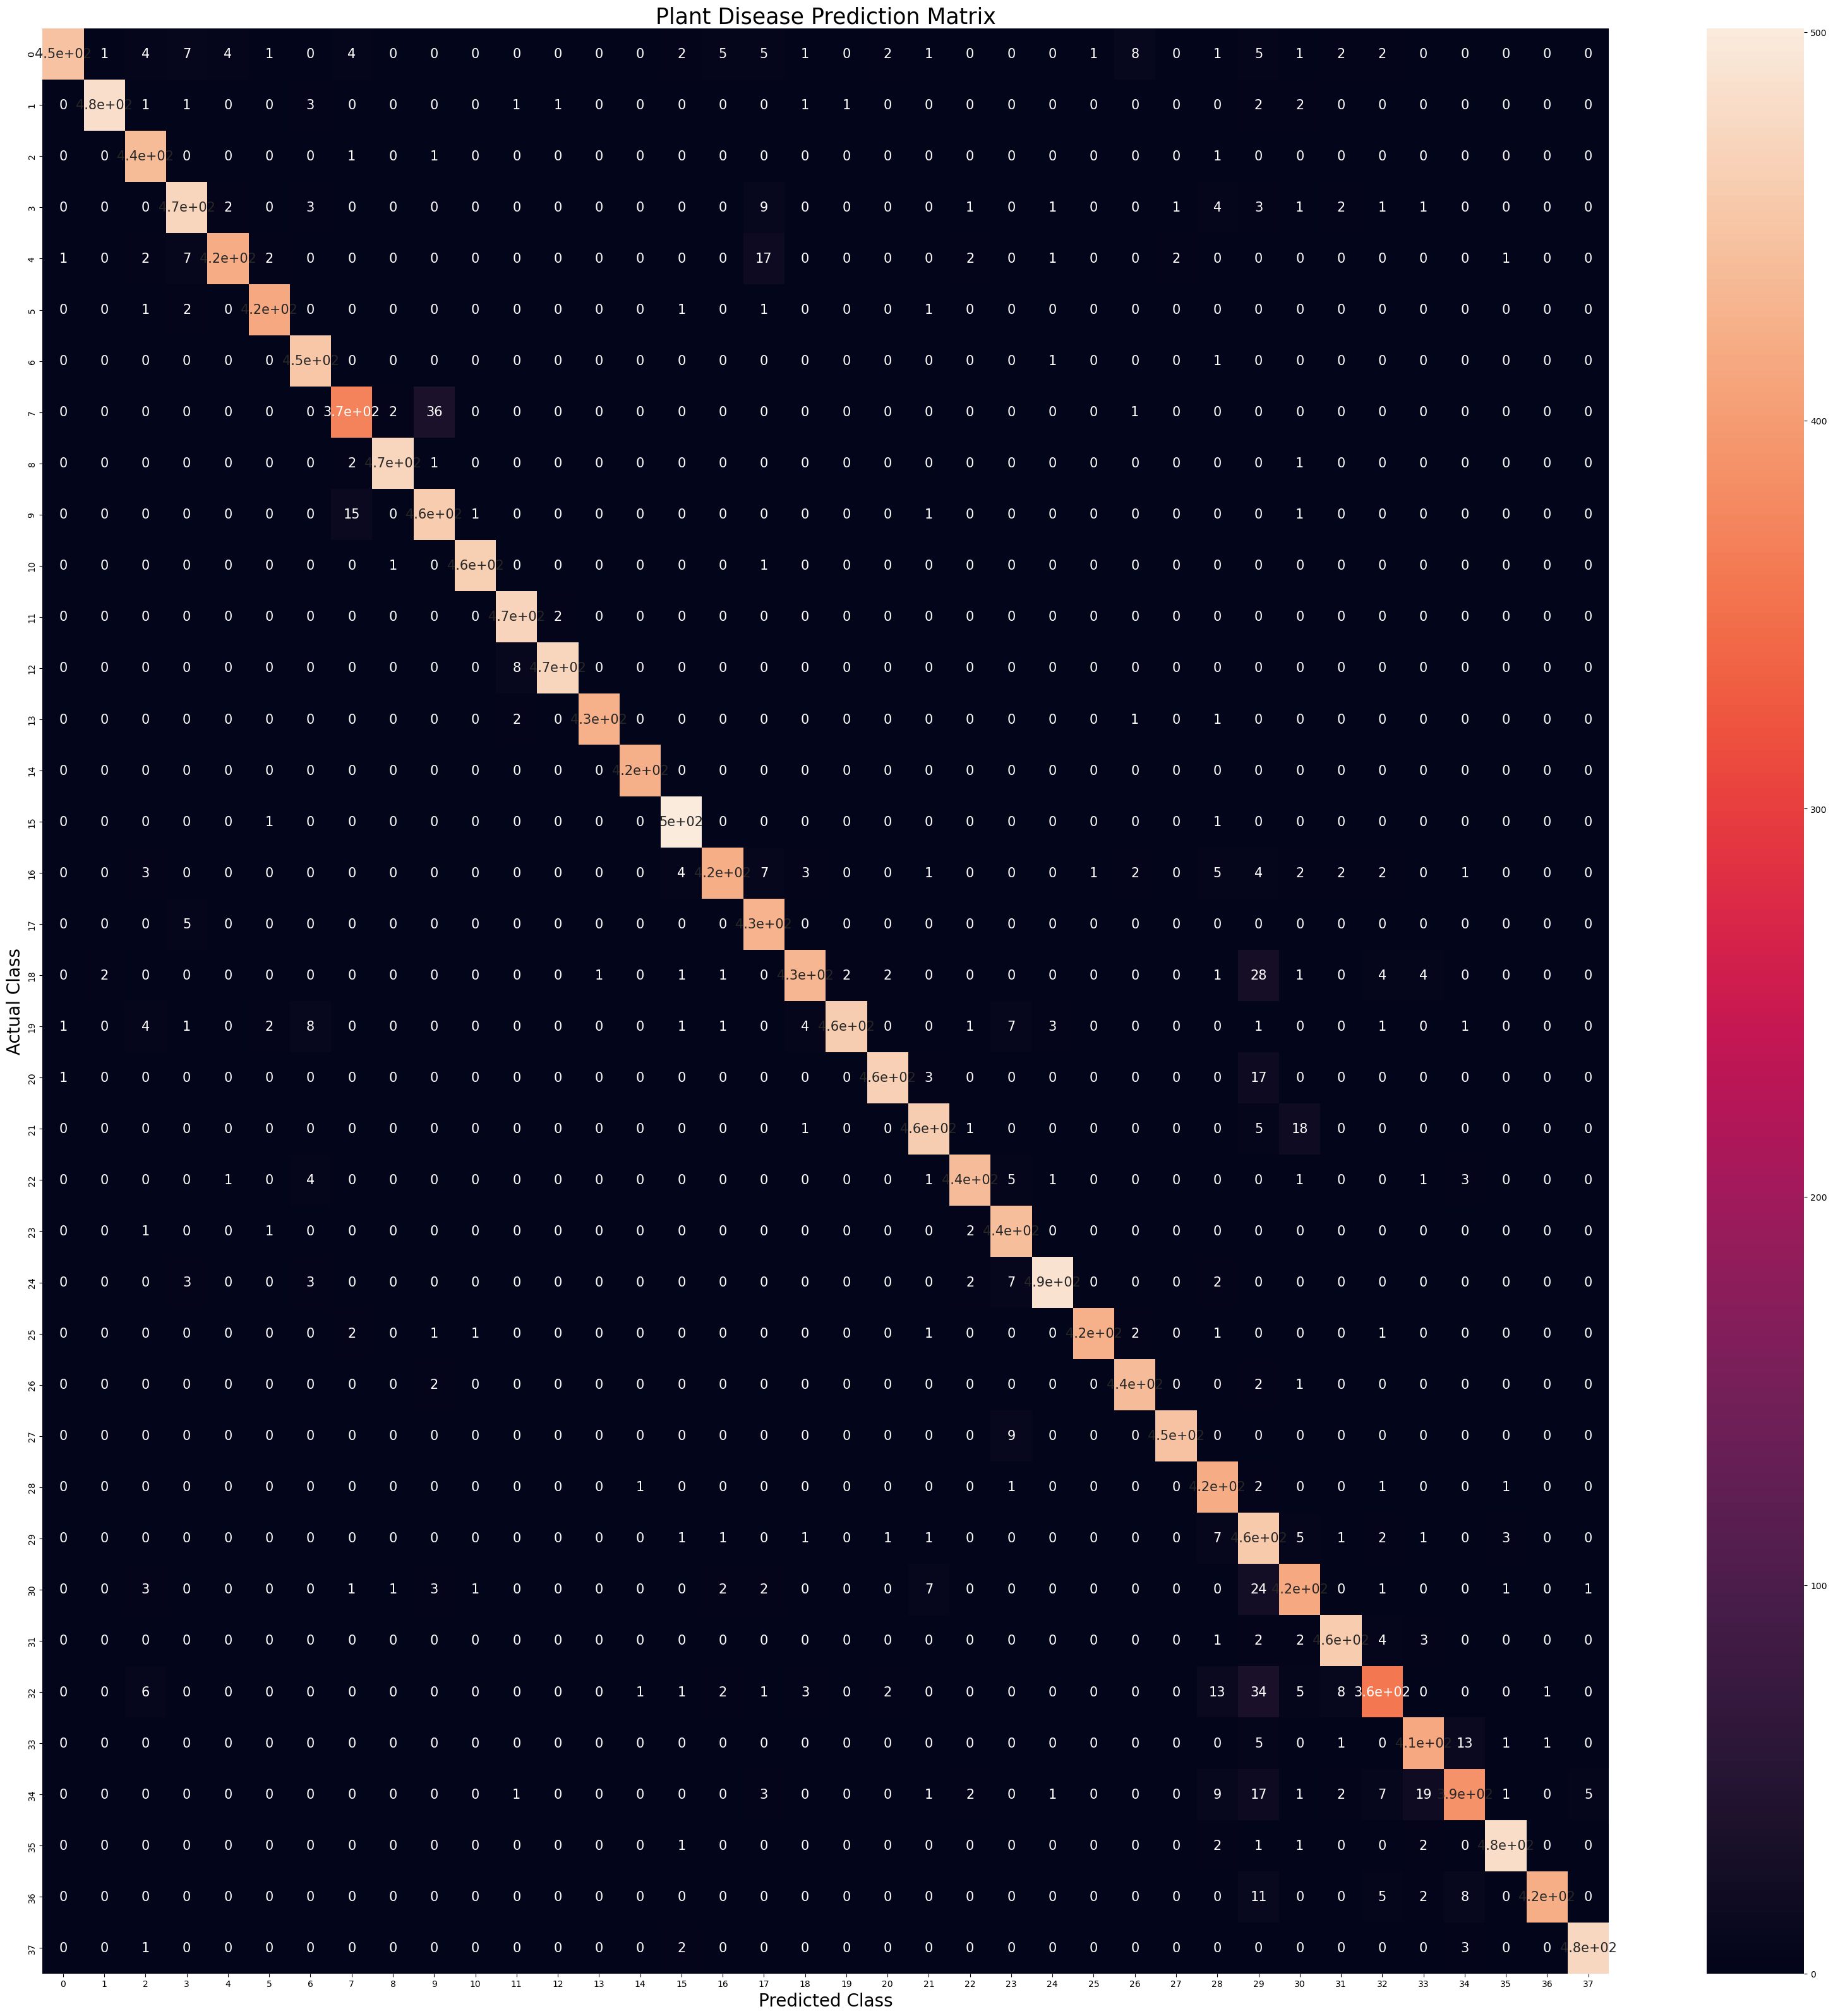

In [59]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':15})
plt.xlabel('Predicted Class',fontsize=20)
plt.ylabel('Actual Class',fontsize=20)
plt.title('Plant Disease Prediction Matrix',fontsize=25)
plt.show()